In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

results = {}

# Importing Data

In [2]:
# data_source_url = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/Tweets.csv"
# cols = ['airline_sentiment','text']
# data = pd.read_csv(data_source_url, usecols=cols)

# data_source_url = "isear.xlsx"
# cols = ['SIT', 'Field1']
# data = pd.read_excel(data_source_url, usecols=cols, engine='openpyxl')

data_source_url = "dataset/train.txt"
data = pd.read_csv(data_source_url, header=None, sep=';', names=['text', 'emotion'], encoding='utf-8')
data.head()

,text,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [3]:
data.describe()

,text,emotion
count,16000,16000
unique,15969,6
top,i resorted to yesterday the post peak day of i...,joy
freq,2,5362


<AxesSubplot:ylabel='emotion'>

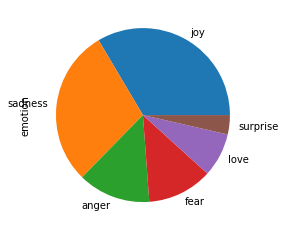

In [4]:
data['emotion'].value_counts().plot.pie()

# Preprocessing

In [5]:
import pandas as pd
import nltk
from string import punctuation
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')

In [6]:
def Toeknization(string):
    words=nltk.word_tokenize(string)
    return ' '.join(words)


def Removestopwords(string):
    for i in punctuation:
        string=string.replace(i,'')
    words=nltk.word_tokenize(string)
    k=[]
    eng_stop=stopwords.words('english')
    for each in words:
        if each not in eng_stop:
            k.append(each.lower())
    return ' '.join(k)


def Lammetization(string):
    words=nltk.word_tokenize(string)
    ws=WordNetLemmatizer()
    l=[]
    for each in words:
        l.append(ws.lemmatize(each))
    return ' '.join(l)

In [7]:
def Refine(string):
    return Lammetization(Removestopwords(Toeknization(string)))

In [8]:
data['processed_text']=data['text'].apply(lambda x: Refine(x))

In [9]:
data.head()

,text,emotion,processed_text
0,i didnt feel humiliated,sadness,didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,sadness,go feeling hopeless damned hopeful around some...
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,love,ever feeling nostalgic fireplace know still pr...
4,i am feeling grouchy,anger,feeling grouchy


## Extra Column Adding (Numericals)

In [10]:
def GetPOSTags(string):
    words=nltk.word_tokenize(string)
    tags=nltk.pos_tag(words)
    return tags

In [11]:
def NounCount(string):
    ntg=GetPOSTags(string)
    allForms=['NN','NNP','NNS','NNPS']
    count=0
    for word,tag in ntg:
        if tag in allForms:
            count+=1
    return count
            
def PronounsCount(string):
    POSTags=GetPOSTags(string)
    allForms=['PRP','PRP$']
    count=0
    for word,tag in POSTags:
        if tag in allForms:
            count+=1
    return count

#Number of Verbs    
def VerbsCount(string):
    POSTags=GetPOSTags(string)
    allForms=['VB','VBP','VBZ','VBG','VBD','VBN']
    count=0
    for word,tag in POSTags:
        if tag in allForms:
            count+=1
    return count

#Number of Adjectives    
def AdjectivesCount(string):
    POSTags=GetPOSTags(string)
    allForms=['JJ','JJR','JJS']
    count=0
    for word,tag in POSTags:
        if tag in allForms:
            count+=1
    return count

#Number of Adverbs    
def AdverbsCount(string):
    POSTags=GetPOSTags(string)
    allForms=['RB','RBR']
    count=0
    for word,tag in POSTags:
        if tag in allForms:
            count+=1
    return count

In [12]:
# nltk.download('averaged_perceptron_tagger')
data['Noun_count']=data['processed_text'].apply(lambda x: NounCount(x))

In [13]:
data['ProNoun_count']=data['processed_text'].apply(lambda x: PronounsCount(x))

In [14]:
data['Verb_count']=data['processed_text'].apply(lambda x: VerbsCount(x))

In [15]:
data['Adjectives_count']=data['processed_text'].apply(lambda x: AdjectivesCount(x))

In [16]:
data['Adverbs_count']=data['processed_text'].apply(lambda x: AdverbsCount(x))

In [17]:
# Final dataset looks like
data.head()

,text,emotion,processed_text,Noun_count,ProNoun_count,Verb_count,Adjectives_count,Adverbs_count
0,i didnt feel humiliated,sadness,didnt feel humiliated,2,0,1,0,0
1,i can go from feeling so hopeless to so damned...,sadness,go feeling hopeless damned hopeful around some...,5,0,2,1,0
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing minute post feel greedy wrong,5,0,1,1,0
3,i am ever feeling nostalgic about the fireplac...,love,ever feeling nostalgic fireplace know still pr...,2,0,2,1,2
4,i am feeling grouchy,anger,feeling grouchy,1,0,1,0,0


# Global Variable

In [18]:
gb_num_words=1000
gb_output_dim=50
gb_epochs=30
gb_n_hidden_layers=25
gb_trainable=False
gd_dense = 6
gb_test_size=0.3
dataset_type = 'Dataset 1'

# Importing Wordembedding layers

In [19]:
con=open('glove.6B.50d.txt',encoding='utf-8')

In [20]:
index={}
for words in con:
    values=words.split()
    word=values[0]
    vect=np.asarray(values[1:],dtype='float32')
    index[word]=vect

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.utils import to_categorical

In [22]:
from tensorflow.keras.layers import Dense, Dropout, Embedding, SimpleRNN, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Flatten
from sklearn.preprocessing import LabelEncoder

enc=LabelEncoder()
tokens=Tokenizer(num_words=gb_num_words)

# Using Embedding layers without numerical columns

In [23]:
from sklearn.model_selection import train_test_split

x=data['text']
y=data['emotion']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=gb_test_size,random_state=100)

In [24]:
tokens.fit_on_texts(x_train)
x_train=tokens.texts_to_sequences(x_train)
x_test=tokens.texts_to_sequences(x_test)
y_train=enc.fit_transform(y_train)
y_test=enc.transform(y_test)

In [25]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [26]:
x_train=pad_sequences(x_train,maxlen=16)
x_test=pad_sequences(x_test,maxlen=16)

In [27]:
matrix=np.zeros((gb_num_words,gb_output_dim))
for word,i in tokens.word_index.items():
    if i<gb_num_words:
        vect=index.get(word)
        if vect is not None:
            matrix[i]=vect

# RNN Model 

## RNN Model without Numerical Columns

In [28]:
model=Sequential()
model.add(Embedding(input_dim=gb_num_words,output_dim=gb_output_dim,weights=[matrix],input_length=16, trainable=gb_trainable))
model.add(SimpleRNN(gb_n_hidden_layers))
model.add(Dense(gd_dense,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [29]:
model.fit(x_train,y_train,epochs=gb_epochs,validation_data=(x_test,y_test),batch_size=32)

Epoch 1/30
350/350 [==============================] - 2s 5ms/step - loss: 1.5955 - accuracy: 0.3557 - val_loss: 1.5415 - val_accuracy: 0.3925
Epoch 2/30
350/350 [==============================] - 2s 6ms/step - loss: 1.4651 - accuracy: 0.4373 - val_loss: 1.4198 - val_accuracy: 0.4710
Epoch 3/30
350/350 [==============================] - 2s 5ms/step - loss: 1.3785 - accuracy: 0.4851 - val_loss: 1.3642 - val_accuracy: 0.4981
Epoch 4/30
350/350 [==============================] - 2s 5ms/step - loss: 1.3268 - accuracy: 0.5057 - val_loss: 1.3612 - val_accuracy: 0.4971
Epoch 5/30
350/350 [==============================] - 2s 5ms/step - loss: 1.2942 - accuracy: 0.5138 - val_loss: 1.3456 - val_accuracy: 0.5075
Epoch 6/30
350/350 [==============================] - 2s 6ms/step - loss: 1.2677 - accuracy: 0.5213 - val_loss: 1.2785 - val_accuracy: 0.5244
Epoch 7/30
350/350 [==============================] - 2s 4ms/step - loss: 1.2422 - accuracy: 0.5307 - val_loss: 1.2713 - val_accuracy: 0.5288
Epoch 

In [30]:
results_rnn=pd.DataFrame(model.history.history)
results_rnn

,loss,accuracy,val_loss,val_accuracy
0,1.595463,0.355714,1.541526,0.392500
1,1.465137,0.437321,1.419818,0.471042
2,1.378455,0.485089,1.364184,0.498125
3,1.326827,0.505714,1.361228,0.497083
4,1.294246,0.513839,1.345587,0.507500
5,1.267692,0.521339,1.278484,0.524375
6,1.242241,0.530714,1.271262,0.528750
7,1.222057,0.542143,1.259693,0.527083
8,1.208526,0.547946,1.337184,0.498542
9,1.178632,0.557857,1.235318,0.545833


In [31]:
results['RNN'] = results_rnn['val_accuracy'].mean()
results_rnn['val_accuracy'].mean()

0.5659930576880773

## RNN Model with Numerical Columns

In [32]:
l=['processed_text', 'ProNoun_count', 'Verb_count', 'Adjectives_count', 'Adverbs_count', 'Noun_count']

In [33]:
x=data[l]
y=data['emotion']

In [34]:
x_text_num_train,x_text_num_test,y_train,y_test=train_test_split(x,y,test_size=gb_test_size,random_state=100)

In [35]:
x_train_text=x_text_num_train['processed_text']
x_test_text=x_text_num_test['processed_text']

In [36]:
tokens.fit_on_texts(x_train_text)
x_train_text=tokens.texts_to_sequences(x_train_text)
x_test_text=tokens.texts_to_sequences(x_test_text)
y_train=enc.fit_transform(y_train)
y_test=enc.transform(y_test)

In [37]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [38]:
y_train.shape

(11200, 6)

In [39]:
x_train_text=pad_sequences(x_train_text,maxlen=16)
x_test_text=pad_sequences(x_test_text,maxlen=16)

In [40]:
x_train_num=np.array(x_text_num_train.drop(columns=['processed_text']))

In [41]:
final_xtrain=np.hstack((x_train_text,x_train_num))

In [42]:
x_test_num=np.array(x_text_num_test.drop(columns=['processed_text']))
final_xtest=np.hstack((x_test_text,x_test_num))

In [43]:
model=Sequential()
model.add(Embedding(input_dim=gb_num_words,output_dim=gb_output_dim,weights=[matrix],input_length=16, trainable=gb_trainable))
model.add(SimpleRNN(gb_n_hidden_layers))
model.add(Dense(gd_dense,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [44]:
model.fit(final_xtrain,y_train,epochs=gb_epochs,validation_data=(final_xtest,y_test),batch_size=32)

Epoch 1/30
350/350 [==============================] - 3s 6ms/step - loss: 1.6098 - accuracy: 0.3208 - val_loss: 1.5850 - val_accuracy: 0.3369
Epoch 2/30
350/350 [==============================] - 2s 6ms/step - loss: 1.5786 - accuracy: 0.3376 - val_loss: 1.5813 - val_accuracy: 0.3400
Epoch 3/30
350/350 [==============================] - 2s 6ms/step - loss: 1.5747 - accuracy: 0.3391 - val_loss: 1.5771 - val_accuracy: 0.3348
Epoch 4/30
350/350 [==============================] - 2s 6ms/step - loss: 1.5708 - accuracy: 0.3421 - val_loss: 1.5815 - val_accuracy: 0.3448
Epoch 5/30
350/350 [==============================] - 2s 6ms/step - loss: 1.5683 - accuracy: 0.3479 - val_loss: 1.5858 - val_accuracy: 0.3400
Epoch 6/30
350/350 [==============================] - 2s 5ms/step - loss: 1.5645 - accuracy: 0.3555 - val_loss: 1.5740 - val_accuracy: 0.3458
Epoch 7/30
350/350 [==============================] - 2s 5ms/step - loss: 1.5604 - accuracy: 0.3568 - val_loss: 1.5688 - val_accuracy: 0.3529
Epoch 

In [45]:
results_rnn_1=pd.DataFrame(model.history.history)
results_rnn_1

,loss,accuracy,val_loss,val_accuracy
0,1.609759,0.320804,1.584961,0.336875
1,1.578556,0.337589,1.581252,0.340000
2,1.574722,0.339107,1.577069,0.334792
3,1.570761,0.342143,1.581515,0.344792
4,1.568302,0.347857,1.585762,0.340000
5,1.564516,0.355536,1.574026,0.345833
6,1.560394,0.356786,1.568797,0.352917
7,1.552989,0.368482,1.568861,0.353125
8,1.546692,0.375000,1.564518,0.363333
9,1.538903,0.383393,1.560881,0.372500


In [46]:
results['RNN_1'] = results_rnn_1['val_accuracy'].mean()
results_rnn_1['val_accuracy'].mean()

0.40571527779102323

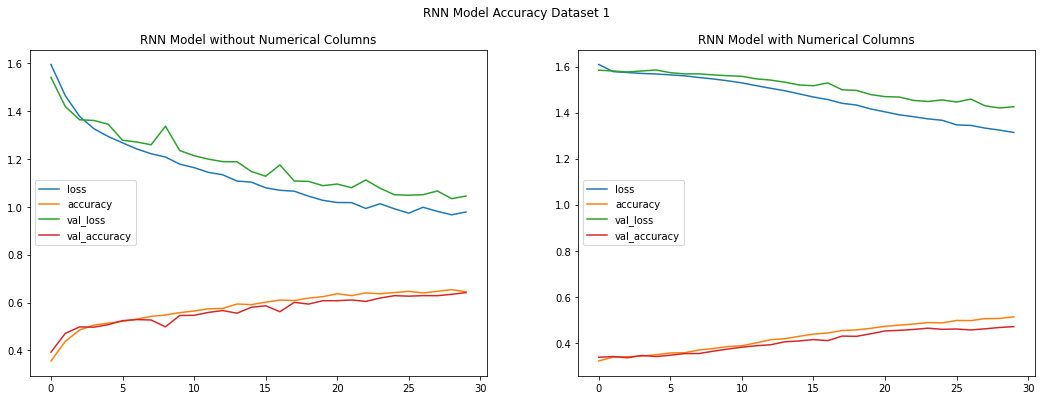

In [47]:
fig, (ax1, ax2) = plt.pyplot.subplots(1, 2, figsize=(18, 6))
fig.suptitle('RNN Model Accuracy {}'.format(dataset_type))
ax1.plot(results_rnn)
ax1.set_title("RNN Model without Numerical Columns")
ax1.legend(results_rnn.columns.values, loc='center left')
ax2.plot(results_rnn_1)
ax2.set_title("RNN Model with Numerical Columns")
ax2.legend(results_rnn.columns.values, loc='center left')

# LSTM Model

## LSTM Model without Numerical Data

In [48]:
x=data['text']
y=data['emotion']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=gb_test_size,random_state=100)

In [49]:
tokens.fit_on_texts(x_train)
x_train=tokens.texts_to_sequences(x_train)
x_test=tokens.texts_to_sequences(x_test)
y_train=enc.fit_transform(y_train)
y_test=enc.transform(y_test)

In [50]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
x_train=pad_sequences(x_train,maxlen=16)
x_test=pad_sequences(x_test,maxlen=16)

In [51]:
matrix=np.zeros((gb_num_words,gb_output_dim))
for word,i in tokens.word_index.items():
    if i<gb_num_words:
        vect=index.get(word)
        if vect is not None:
            matrix[i]=vect

In [52]:
model=Sequential()
model.add(Embedding(input_dim=gb_num_words,output_dim=gb_output_dim,weights=[matrix],input_length=16, trainable=gb_trainable))
model.add(LSTM(gb_n_hidden_layers))
model.add(Dense(gd_dense,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [53]:
model.fit(x_train,y_train,epochs=gb_epochs,validation_data=(x_test,y_test),batch_size=32)

Epoch 1/30
350/350 [==============================] - 4s 8ms/step - loss: 1.4885 - accuracy: 0.4271 - val_loss: 1.3651 - val_accuracy: 0.4952
Epoch 2/30
350/350 [==============================] - 2s 6ms/step - loss: 1.2776 - accuracy: 0.5241 - val_loss: 1.2406 - val_accuracy: 0.5452
Epoch 3/30
350/350 [==============================] - 2s 6ms/step - loss: 1.1637 - accuracy: 0.5696 - val_loss: 1.1444 - val_accuracy: 0.5796
Epoch 4/30
350/350 [==============================] - 2s 6ms/step - loss: 1.0751 - accuracy: 0.6071 - val_loss: 1.0638 - val_accuracy: 0.6125
Epoch 5/30
350/350 [==============================] - 2s 6ms/step - loss: 0.9820 - accuracy: 0.6448 - val_loss: 1.0120 - val_accuracy: 0.6310
Epoch 6/30
350/350 [==============================] - 2s 6ms/step - loss: 0.9119 - accuracy: 0.6724 - val_loss: 0.9483 - val_accuracy: 0.6556
Epoch 7/30
350/350 [==============================] - 2s 6ms/step - loss: 0.8571 - accuracy: 0.6938 - val_loss: 0.9014 - val_accuracy: 0.6712
Epoch 

In [54]:
results_lstm=pd.DataFrame(model.history.history)
results_lstm

,loss,accuracy,val_loss,val_accuracy
0,1.488487,0.427143,1.365061,0.495208
1,1.277587,0.524107,1.240569,0.545208
2,1.163690,0.569554,1.144428,0.579583
3,1.075094,0.607054,1.063807,0.612500
4,0.981989,0.644821,1.012027,0.631042
5,0.911862,0.672411,0.948308,0.655625
6,0.857144,0.693839,0.901386,0.671250
7,0.813044,0.714554,0.863257,0.690000
8,0.771583,0.729911,0.847440,0.690625
9,0.734590,0.749732,0.812252,0.718750


In [55]:
results['LSTM'] = results_lstm['val_accuracy'].mean()
results_lstm['val_accuracy'].mean()

0.710298611720403

## LSTM Model with Numerical Data

In [56]:
x=data[l]
y=data['emotion']
x_text_num_train,x_text_num_test,y_train,y_test=train_test_split(x,y,test_size=gb_test_size,random_state=100)

In [57]:
x_train_text=x_text_num_train['processed_text']
x_test_text=x_text_num_test['processed_text']

In [58]:
tokens.fit_on_texts(x_train_text)
x_train_text=tokens.texts_to_sequences(x_train_text)
x_test_text=tokens.texts_to_sequences(x_test_text)
y_train=enc.fit_transform(y_train)
y_test=enc.transform(y_test)

In [59]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [60]:
x_train_text=pad_sequences(x_train_text,maxlen=16)
x_test_text=pad_sequences(x_test_text,maxlen=16)

In [61]:
x_train_num=np.array(x_text_num_train.drop(columns=['processed_text']))
x_test_num=np.array(x_text_num_test.drop(columns=['processed_text']))

In [62]:
final_xtrain=np.hstack((x_train_text,x_train_num))
final_xtest=np.hstack((x_test_text,x_test_num))

In [63]:
model=Sequential()
model.add(Embedding(input_dim=gb_num_words,output_dim=gb_output_dim,weights=[matrix],input_length=16, trainable=gb_trainable))
model.add(LSTM(gb_n_hidden_layers))
model.add(Dense(gd_dense,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [64]:
model.fit(final_xtrain,y_train,epochs=gb_epochs,validation_data=(final_xtest,y_test),batch_size=32)

Epoch 1/30
350/350 [==============================] - 5s 9ms/step - loss: 1.5889 - accuracy: 0.3242 - val_loss: 1.5815 - val_accuracy: 0.3363
Epoch 2/30
350/350 [==============================] - 3s 7ms/step - loss: 1.5669 - accuracy: 0.3477 - val_loss: 1.5672 - val_accuracy: 0.3546
Epoch 3/30
350/350 [==============================] - 3s 8ms/step - loss: 1.5467 - accuracy: 0.3694 - val_loss: 1.5659 - val_accuracy: 0.3708
Epoch 4/30
350/350 [==============================] - 3s 8ms/step - loss: 1.5136 - accuracy: 0.3895 - val_loss: 1.5012 - val_accuracy: 0.4021
Epoch 5/30
350/350 [==============================] - 3s 8ms/step - loss: 1.4524 - accuracy: 0.4247 - val_loss: 1.4489 - val_accuracy: 0.4465
Epoch 6/30
350/350 [==============================] - 3s 8ms/step - loss: 1.3709 - accuracy: 0.4745 - val_loss: 1.3768 - val_accuracy: 0.4812
Epoch 7/30
350/350 [==============================] - 3s 8ms/step - loss: 1.2915 - accuracy: 0.5180 - val_loss: 1.3029 - val_accuracy: 0.5160
Epoch 

In [65]:
results_lstm_1=pd.DataFrame(model.history.history)
results_lstm_1

,loss,accuracy,val_loss,val_accuracy
0,1.588856,0.324196,1.581519,0.336250
1,1.566901,0.347679,1.567244,0.354583
2,1.546737,0.369375,1.565901,0.370833
3,1.513635,0.389464,1.501204,0.402083
4,1.452434,0.424732,1.448901,0.446458
5,1.370929,0.474464,1.376778,0.481250
6,1.291533,0.518036,1.302875,0.516042
7,1.209288,0.553482,1.240094,0.540833
8,1.135079,0.589286,1.190671,0.564583
9,1.067241,0.613929,1.152807,0.580417


In [66]:
results['LSTM_1'] = results_lstm_1['val_accuracy'].mean()
results_lstm_1['val_accuracy'].mean()

0.616013890504837

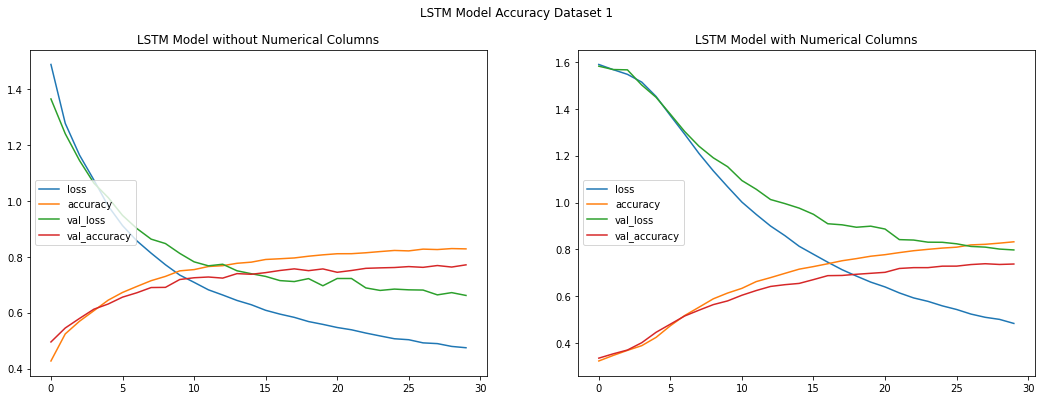

In [67]:
fig, (ax1, ax2) = plt.pyplot.subplots(1, 2, figsize=(18, 6))
fig.suptitle('LSTM Model Accuracy {}'.format(dataset_type))
ax1.plot(results_lstm)
ax1.set_title("LSTM Model without Numerical Columns")
ax1.legend(results_rnn.columns.values, loc='center left')
ax2.plot(results_lstm_1)
ax2.set_title("LSTM Model with Numerical Columns")
ax2.legend(results_rnn.columns.values, loc='center left')

# Hybrid Model (LSTM + RNN)

## Hybrid Model without Numerical Data

In [68]:
x=data['text']
y=data['emotion']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=gb_test_size,random_state=100)

In [69]:
tokens.fit_on_texts(x_train)
x_train=tokens.texts_to_sequences(x_train)
x_test=tokens.texts_to_sequences(x_test)
y_train=enc.fit_transform(y_train)
y_test=enc.transform(y_test)

In [70]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
x_train=pad_sequences(x_train,maxlen=16)
x_test=pad_sequences(x_test,maxlen=16)

In [71]:
matrix=np.zeros((gb_num_words,gb_output_dim))
for word,i in tokens.word_index.items():
    if i<gb_num_words:
        vect=index.get(word)
        if vect is not None:
            matrix[i]=vect

In [72]:
model=Sequential()
model.add(Embedding(input_dim=gb_num_words,output_dim=gb_output_dim,weights=[matrix],input_length=16, trainable=gb_trainable))
model.add(LSTM(gb_n_hidden_layers,return_sequences=True))
model.add(SimpleRNN(gb_n_hidden_layers))
model.add(Dense(gd_dense,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [73]:
model.fit(x_train,y_train,epochs=gb_epochs,validation_data=(x_test,y_test),batch_size=32)

Epoch 1/30
350/350 [==============================] - 6s 13ms/step - loss: 1.4954 - accuracy: 0.4095 - val_loss: 1.3846 - val_accuracy: 0.4744
Epoch 2/30
350/350 [==============================] - 3s 9ms/step - loss: 1.2755 - accuracy: 0.5104 - val_loss: 1.2282 - val_accuracy: 0.5390
Epoch 3/30
350/350 [==============================] - 4s 12ms/step - loss: 1.1389 - accuracy: 0.5789 - val_loss: 1.1070 - val_accuracy: 0.5962
Epoch 4/30
350/350 [==============================] - 4s 10ms/step - loss: 1.0228 - accuracy: 0.6277 - val_loss: 1.0333 - val_accuracy: 0.6246
Epoch 5/30
350/350 [==============================] - 4s 11ms/step - loss: 0.9236 - accuracy: 0.6665 - val_loss: 0.9273 - val_accuracy: 0.6669
Epoch 6/30
350/350 [==============================] - 3s 9ms/step - loss: 0.8496 - accuracy: 0.6973 - val_loss: 0.8869 - val_accuracy: 0.6850
Epoch 7/30
350/350 [==============================] - 3s 8ms/step - loss: 0.7979 - accuracy: 0.7189 - val_loss: 0.8258 - val_accuracy: 0.7135
Ep

In [74]:
results_hybrid=pd.DataFrame(model.history.history)
results_hybrid

,loss,accuracy,val_loss,val_accuracy
0,1.495419,0.409464,1.384618,0.474375
1,1.275543,0.510446,1.228197,0.538958
2,1.138879,0.578929,1.107034,0.596250
3,1.022790,0.627679,1.033256,0.624583
4,0.923580,0.666518,0.927271,0.666875
5,0.849640,0.697321,0.886889,0.685000
6,0.797898,0.718929,0.825763,0.713542
7,0.742550,0.741518,0.791885,0.724375
8,0.703424,0.754375,0.787613,0.726875
9,0.666931,0.769196,0.735837,0.748542


In [75]:
results['Hybrid'] = results_hybrid['val_accuracy'].mean()
results_hybrid['val_accuracy'].mean()

0.7318680504957835

## Hybrid Model with Numerical Data


In [76]:
x=data[l]
y=data['emotion']
x_text_num_train,x_text_num_test,y_train,y_test=train_test_split(x,y,test_size=gb_test_size,random_state=100)

In [77]:
x_train_text=x_text_num_train['processed_text']
x_test_text=x_text_num_test['processed_text']

In [78]:
tokens.fit_on_texts(x_train_text)
x_train_text=tokens.texts_to_sequences(x_train_text)
x_test_text=tokens.texts_to_sequences(x_test_text)
y_train=enc.fit_transform(y_train)
y_test=enc.transform(y_test)

In [79]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [80]:
x_train_text=pad_sequences(x_train_text,maxlen=16)
x_test_text=pad_sequences(x_test_text,maxlen=16)

In [81]:
x_train_num=np.array(x_text_num_train.drop(columns=['processed_text']))
x_test_num=np.array(x_text_num_test.drop(columns=['processed_text']))

In [82]:
final_xtrain=np.hstack((x_train_text,x_train_num))
final_xtest=np.hstack((x_test_text,x_test_num))

In [83]:
matrix=np.zeros((gb_num_words,gb_output_dim))
for word,i in tokens.word_index.items():
    if i<gb_num_words:
        vect=index.get(word)
        if vect is not None:
            matrix[i]=vect

In [84]:
model=Sequential()
model.add(Embedding(input_dim=gb_num_words,output_dim=gb_output_dim,weights=[matrix],input_length=16, trainable=gb_trainable))
model.add(LSTM(gb_n_hidden_layers,return_sequences=True))
model.add(SimpleRNN(gb_n_hidden_layers))
model.add(Dense(gd_dense,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [85]:
model.fit(final_xtrain,y_train,epochs=gb_epochs,validation_data=(final_xtest,y_test),batch_size=32)

Epoch 1/30
350/350 [==============================] - 5s 10ms/step - loss: 1.4117 - accuracy: 0.4652 - val_loss: 1.3205 - val_accuracy: 0.5063
Epoch 2/30
350/350 [==============================] - 3s 9ms/step - loss: 1.1794 - accuracy: 0.5633 - val_loss: 1.1111 - val_accuracy: 0.5804
Epoch 3/30
350/350 [==============================] - 3s 9ms/step - loss: 0.9901 - accuracy: 0.6325 - val_loss: 0.9363 - val_accuracy: 0.6579
Epoch 4/30
350/350 [==============================] - 3s 9ms/step - loss: 0.8416 - accuracy: 0.6918 - val_loss: 0.8243 - val_accuracy: 0.7033
Epoch 5/30
350/350 [==============================] - 3s 9ms/step - loss: 0.7267 - accuracy: 0.7389 - val_loss: 0.7300 - val_accuracy: 0.7519
Epoch 6/30
350/350 [==============================] - 3s 9ms/step - loss: 0.6470 - accuracy: 0.7771 - val_loss: 0.6911 - val_accuracy: 0.7667
Epoch 7/30
350/350 [==============================] - 3s 9ms/step - loss: 0.5901 - accuracy: 0.7931 - val_loss: 0.6235 - val_accuracy: 0.7919
Epoch

In [86]:
results_hybrid_1=pd.DataFrame(model.history.history)
results_hybrid_1

,loss,accuracy,val_loss,val_accuracy
0,1.411740,0.465179,1.320463,0.506250
1,1.179367,0.563304,1.111079,0.580417
2,0.990142,0.632500,0.936309,0.657917
3,0.841588,0.691786,0.824258,0.703333
4,0.726654,0.738929,0.730047,0.751875
5,0.647044,0.777143,0.691084,0.766667
6,0.590137,0.793125,0.623475,0.791875
7,0.538005,0.811964,0.609412,0.789792
8,0.500961,0.825982,0.575062,0.805833
9,0.463553,0.840089,0.560465,0.815833


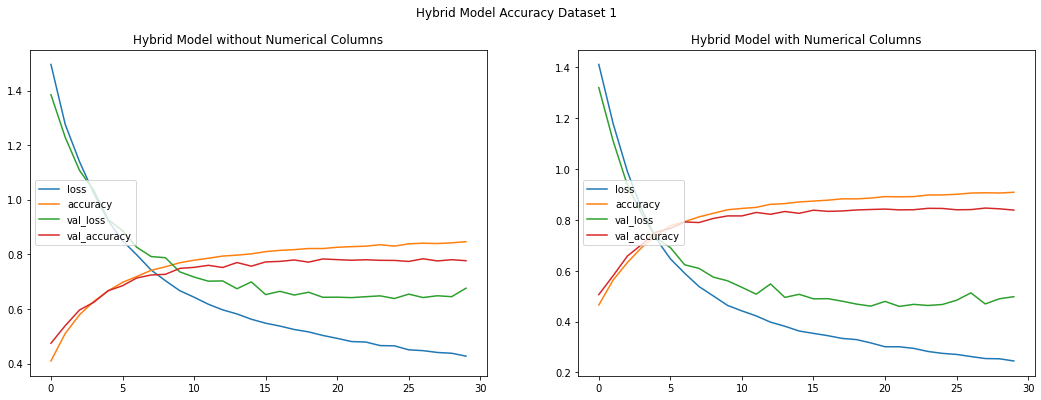

In [87]:
fig, (ax1, ax2) = plt.pyplot.subplots(1, 2, figsize=(18, 6))
fig.suptitle('Hybrid Model Accuracy {}'.format(dataset_type))
ax1.plot(results_hybrid)
ax1.set_title("Hybrid Model without Numerical Columns")
ax1.legend(results_rnn.columns.values, loc='center left')
ax2.plot(results_hybrid_1)
ax2.set_title("Hybrid Model with Numerical Columns")
ax2.legend(results_rnn.columns.values, loc='center left')

In [88]:
results['Hybrid_1'] = results_hybrid_1['val_accuracy'].mean()
results_hybrid_1['val_accuracy'].mean()

0.7969027777512868

# Results of all models

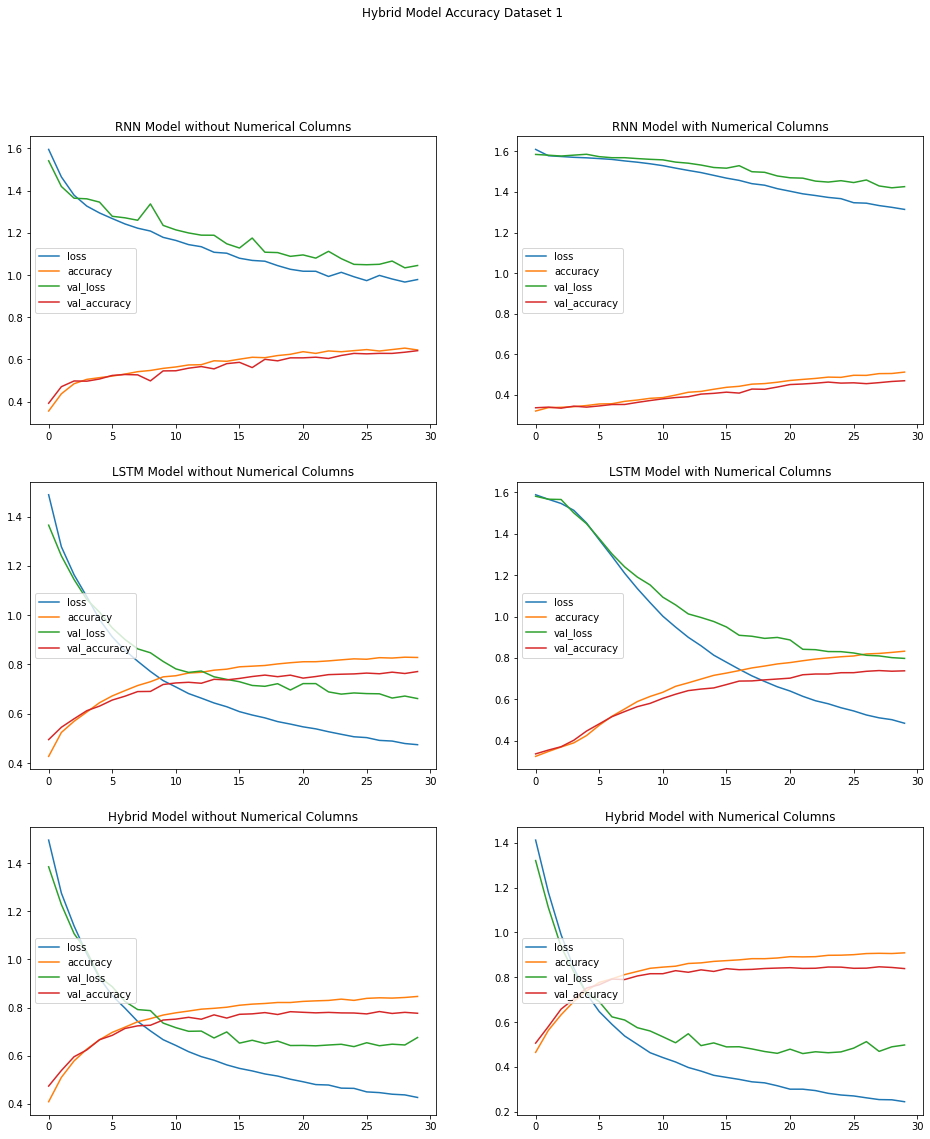

In [89]:
fig, axis = plt.pyplot.subplots(3, 2, figsize=(16, 18))

# fig.suptitle('Model Accuracy')
fig.suptitle('Hybrid Model Accuracy {}'.format(dataset_type))
axis[0, 0].plot(results_rnn)
axis[0, 0].set_title("RNN Model without Numerical Columns")
axis[0, 0].legend(results_rnn.columns.values, loc='center left')
axis[0, 1].plot(results_rnn_1)
axis[0, 1].set_title("RNN Model with Numerical Columns")
axis[0, 1].legend(results_rnn.columns.values, loc='center left')
axis[1, 0].plot(results_lstm)
axis[1, 0].set_title("LSTM Model without Numerical Columns")
axis[1, 0].legend(results_rnn.columns.values, loc='center left')
axis[1, 1].plot(results_lstm_1)
axis[1, 1].set_title("LSTM Model with Numerical Columns")
axis[1, 1].legend(results_rnn.columns.values, loc='center left')
axis[2, 0].plot(results_hybrid)
axis[2, 0].set_title("Hybrid Model without Numerical Columns")
axis[2, 0].legend(results_rnn.columns.values, loc='center left')
axis[2, 1].plot(results_hybrid_1)
axis[2, 1].set_title("Hybrid Model with Numerical Columns")
axis[2, 1].legend(results_rnn.columns.values, loc='center left')

In [90]:
print("Number of Words -", gb_num_words ," | Epochs - ", gb_epochs ," | Hidden Layer - ",gb_n_hidden_layers)
print("Dataset - ", data_source_url)
print("RNN")
print(results_rnn[-1:])
print("RNN_1")
print(results_rnn_1[-1:])
print("LSTM")
print(results_lstm[-1:])
print("LSTM_1")
print(results_lstm_1[-1:])
print("Hybrid")
print(results_hybrid[-1:])
print("Hybrid_1")
print(results_hybrid_1[-1:])

Number of Words - 1000  | Epochs -  30  | Hidden Layer -  25
Dataset -  dataset/train.txt
RNN
       loss  accuracy  val_loss  val_accuracy
29  0.97877     0.645  1.045346      0.641667
RNN_1
        loss  accuracy  val_loss  val_accuracy
29  1.314127  0.512589  1.426251          0.47
LSTM
        loss  accuracy  val_loss  val_accuracy
29  0.474512  0.828393  0.661688       0.77125
LSTM_1
       loss  accuracy  val_loss  val_accuracy
29  0.48431    0.8325   0.79777      0.737708
Hybrid
        loss  accuracy  val_loss  val_accuracy
29  0.427157  0.846429   0.67597      0.776667
Hybrid_1
       loss  accuracy  val_loss  val_accuracy
29  0.24502  0.908929     0.498       0.83875


In [91]:
for key in results:
    print(key, '->', results[key])

RNN -> 0.5659930576880773
RNN_1 -> 0.40571527779102323
LSTM -> 0.710298611720403
LSTM_1 -> 0.616013890504837
Hybrid -> 0.7318680504957835
Hybrid_1 -> 0.7969027777512868


In [92]:
# https://www.javacodemonk.com/difference-between-loss-accuracy-validation-loss-validation-accuracy-in-keras-ff358faa

In [93]:
import tensorflow as tf
print(tf.__version__)

2.5.0
